In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [348]:
d_data = pd.read_csv('/Users/joemarsilla/OARensemble2021_deepmind.csv', index_col=0)
p_data = pd.read_csv('/Users/joemarsilla/OARensemble2021_pddca2.csv', index_col=0)
h_data = pd.read_csv('/Users/joemarsilla/OARensemble2021_hnscc3drt2.csv', index_col=0)
m_data = pd.read_csv('/Users/joemarsilla/OARensemble2021_hn1.csv', index_col=0)
s_data = pd.read_csv('/Users/joemarsilla/OARensemble2021_structseg.csv', index_col=0)
r_data = pd.read_csv('/Users/joemarsilla/OARensemble2021_corrected.csv', index_col=0)

In [349]:
r_data.head()

,OAR,Patient,VolDice,95HD,SurfDice,Observer
0,BSTEM,0,0.850081,3.000000,1.134316,rc_radiologist
1,SPCOR,0,0.827113,2.236068,1.092190,rc_radiologist
2,ESOPH,0,0.833083,3.162278,1.103672,rc_radiologist
3,LARYNX,0,0.895342,2.000000,0.853980,rc_radiologist
4,MAND,0,0.951560,1.000000,0.346290,rc_radiologist


In [350]:
exclude = ['0522c0727b', '0522c0727a']
d_data = d_data[~d_data.Patient.isin(exclude)]
exclude = ['Spinal-Canal']
d_data = d_data[~d_data.OAR_Deepmind.isin(exclude)]

In [354]:
exclude = ['Mid_Ear_L', 'Mid_Ear_R']
s_data = s_data[~s_data.OAR_STRUCT.isin(exclude)]

In [355]:
rois = ['MAND', 'LEYE', 'REYE', 'BSTEM', 'LARYNX', 'SPCOR', 'LPAR', 'RPAR', 'ESOPH', 'LLENS', 'RLENS', 'LOPTIC', 'ROPTIC', 'LIPS','CHIASM']

In [356]:
import seaborn as sea

In [357]:
d_data.head()

,OAR,OAR_Deepmind,Patient,VolDice,95HD,SurfDice,Observer
0,BSTEM,Brainstem,0522c0427,0.791135,3.162278,1.596496,radiographer
1,LLENS,Lens-Lt,0522c0427,0.615385,1.648528,0.873513,radiographer
2,RLENS,Lens-Rt,0522c0427,0.532423,2.000000,1.105801,radiographer
3,MAND,Mandible,0522c0427,0.857699,2.000000,0.816564,radiographer
4,LOPTIC,Optic-Nerve-Lt,0522c0427,0.514573,6.352054,1.576920,radiographer


In [8]:
import numpy as np
sorted_ = h_data.groupby('OAR', as_index=True)['OAR']
np.array(sorted_.count())
# sorted_.count()
median_h['Counts'] = sorted_.count()

array([82, 61, 12, 68, 47, 46,  5,  9, 27, 71, 60, 69, 49, 28, 71, 83])

In [344]:
# calculate number of pateints..


38.21052631578947

In [410]:
# Getting median values of each dataset
median_p =p_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].median()
observer = ['pddca_radiographer' for p in range(len(median_p))]
std = p_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].std()
median_p['VolDice_std'] = std['VolDice']
median_p['95HD_std'] = std['95HD']
median_p['SurfDice_std'] = std['SurfDice']
median_p['Observer'] = observer
sorted_ = p_data.groupby('OAR', as_index=True)['OAR']
median_p['Counts'] = np.array(sorted_.count())
####
median_h = h_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].median()
observer = ['hn3d_radiographer' for p in range(len(median_h))]
std = h_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].std()
median_h['VolDice_std'] = std['VolDice']
median_h['95HD_std'] = std['95HD']
median_h['SurfDice_std'] = std['SurfDice']
median_h['Observer'] = observer
sorted_ = h_data.groupby('OAR', as_index=True)['OAR']
median_h['Counts'] = np.array(sorted_.count())
#####
median_m = m_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].median()
observer = ['hn1_radiographer' for p in range(len(median_m))]
std = m_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].std()
median_m['VolDice_std'] = std['VolDice']
median_m['95HD_std'] = std['95HD']
median_m['SurfDice_std'] = std['SurfDice']
median_m['Observer'] = observer
sorted_ = m_data.groupby('OAR', as_index=True)['OAR']
median_m['Counts'] = np.array(sorted_.count())
####
median_r = r_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].median()
observer = ['rad_radiographer' for p in range(len(median_r))]
std = r_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].std()
median_r['VolDice_std'] = std['VolDice']
median_r['95HD_std'] = std['95HD']
median_r['SurfDice_std'] = std['SurfDice']
median_r['Observer'] = observer
sorted_ = r_data.groupby('OAR', as_index=True)['OAR']
median_r['Counts'] = np.array(sorted_.count())
###
median_s = s_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].median()
observer = ['stseg_radiographer' for p in range(len(median_s))]
std = s_data.groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].std()
median_s['VolDice_std'] = std['VolDice']
median_s['95HD_std'] = std['95HD']
median_s['SurfDice_std'] = std['SurfDice']
median_s['Observer'] = observer
sorted_ = s_data.groupby('OAR', as_index=True)['OAR']
median_s['Counts'] = np.array(sorted_.count())
###
median_d1 = d_data[d_data['Observer']!='radiographer'].groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].median()
observer = ['dm_oncologist' for p in range(len(median_d1))]
std = d_data[d_data['Observer']!='radiographer'].groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].std()
median_d1['VolDice_std'] = std['VolDice']
median_d1['95HD_std'] = std['95HD']
median_d1['SurfDice_std'] = std['SurfDice']
median_d1['Observer'] = observer
sorted_ = d_data[d_data['Observer']!='radiographer'].groupby('OAR', as_index=True)['OAR']
median_d1['Counts'] = np.array(sorted_.count())
median_d2 = d_data[d_data['Observer']!='oncologist'].groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].median()
observer = ['dm_radiographer' for p in range(len(median_d2))]
std = d_data[d_data['Observer']!='oncologist'].groupby('OAR', as_index=False)[['VolDice', '95HD', 'SurfDice']].std()
median_d2['VolDice_std'] = std['VolDice']
median_d2['95HD_std'] = std['95HD']
median_d2['SurfDice_std'] = std['SurfDice']
median_d2['Observer'] = observer
sorted_ = d_data[d_data['Observer']!='oncologist'].groupby('OAR', as_index=True)['OAR']
median_d2['Counts'] = np.array(sorted_.count())

In [419]:
s_data[s_data['OAR']=='RACOU'].median()

/var/folders/4n/x4ks02rx2g9925jn6xb07jkw0000gn/T/ipykernel_936/1793552043.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s_data[s_data['OAR']=='RACOU'].median()


Patient     25.500000
VolDice      0.632490
95HD         3.734852
SurfDice     0.782584
dtype: float64

In [15]:
std = h_data.groupby('OAR', as_index=False)[['VolDice', '95HD']].std()

0     0.045814
1     0.206357
2     0.213896
3     0.075929
4     0.136395
5     0.049086
6     0.052815
7     0.162833
8     0.117645
9     0.104357
10    0.060866
11    0.085512
12    0.051261
13    0.163403
14    0.089850
15    0.085830
Name: VolDice, dtype: float64

In [411]:
data_median = pd.concat([median_r, median_s, median_d1, median_d2,median_p,median_m,median_h])

In [412]:
data_median.to_csv('/Users/joemarsilla/Median_Performance_External_validation_01052022.csv')

In [413]:
data_median

,OAR,VolDice,95HD,SurfDice,VolDice_std,95HD_std,SurfDice_std,Observer,Counts
0,BSTEM,0.839614,3.000000,1.249724,0.046400,0.883294,0.407904,rad_radiographer,59
1,CHIASM,0.401028,5.099020,1.238545,0.183534,3.943288,1.468696,rad_radiographer,59
2,ESOPH,0.827362,3.162278,1.070790,0.071651,5.481063,0.570488,rad_radiographer,59
3,LACOU,0.791837,1.573132,0.670757,0.174297,9.785202,8.414200,rad_radiographer,59
4,LARYNX,0.876082,2.236068,0.922978,0.061593,1.379823,1.484772,rad_radiographer,59
...,...,...,...,...,...,...,...,...,...
11,RACOU,0.172360,9.949874,4.852517,0.085512,43.982732,16.765637,hn3d_radiographer,69
12,REYE,0.831729,2.449490,1.089068,0.051261,0.644436,0.255830,hn3d_radiographer,49
13,ROPTIC,0.552312,6.039669,1.632609,0.163403,5.141368,1.996195,hn3d_radiographer,28
14,RPAR,0.813885,5.744563,1.444092,0.089850,4.855924,0.984204,hn3d_radiographer,71


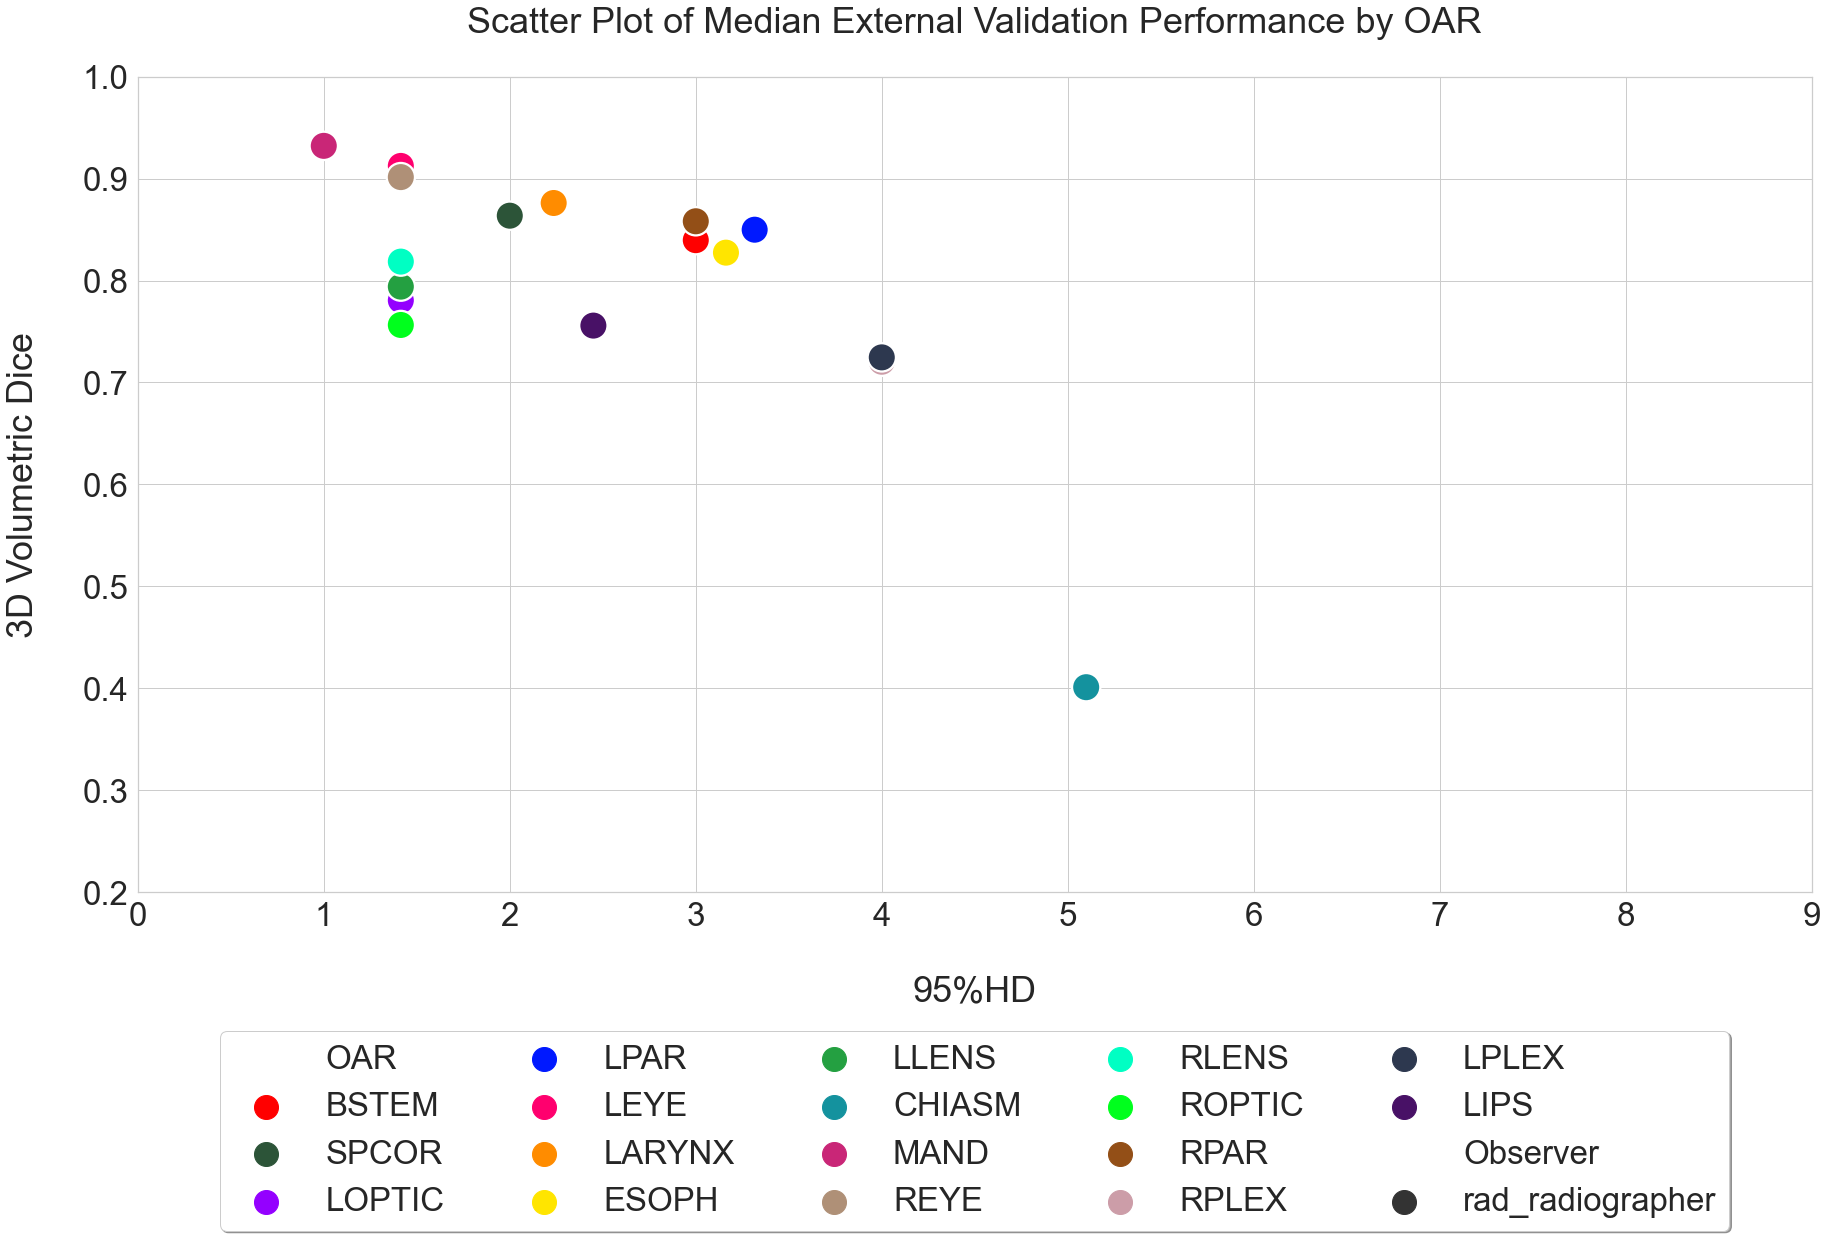

In [345]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#2c5438', '#9400ff', '#0019ff', '#ff006e', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#00ff1d', '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00']
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR\n')
plt.ylim(0.2, 1.0)
plt.xlim(0,9)
plt.ylabel('3D Volumetric Dice\n')
plt.xlabel('\n95%HD')
exclude = ['LACOU', 'RACOU']
data_ = data_median[~data_median.OAR.isin(exclude)]
data_ = data_.sort_values(by=['Counts'])
include = ['rad_radiographer']
data_ = data_[data_.Observer.isin(include)]
# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
g = sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


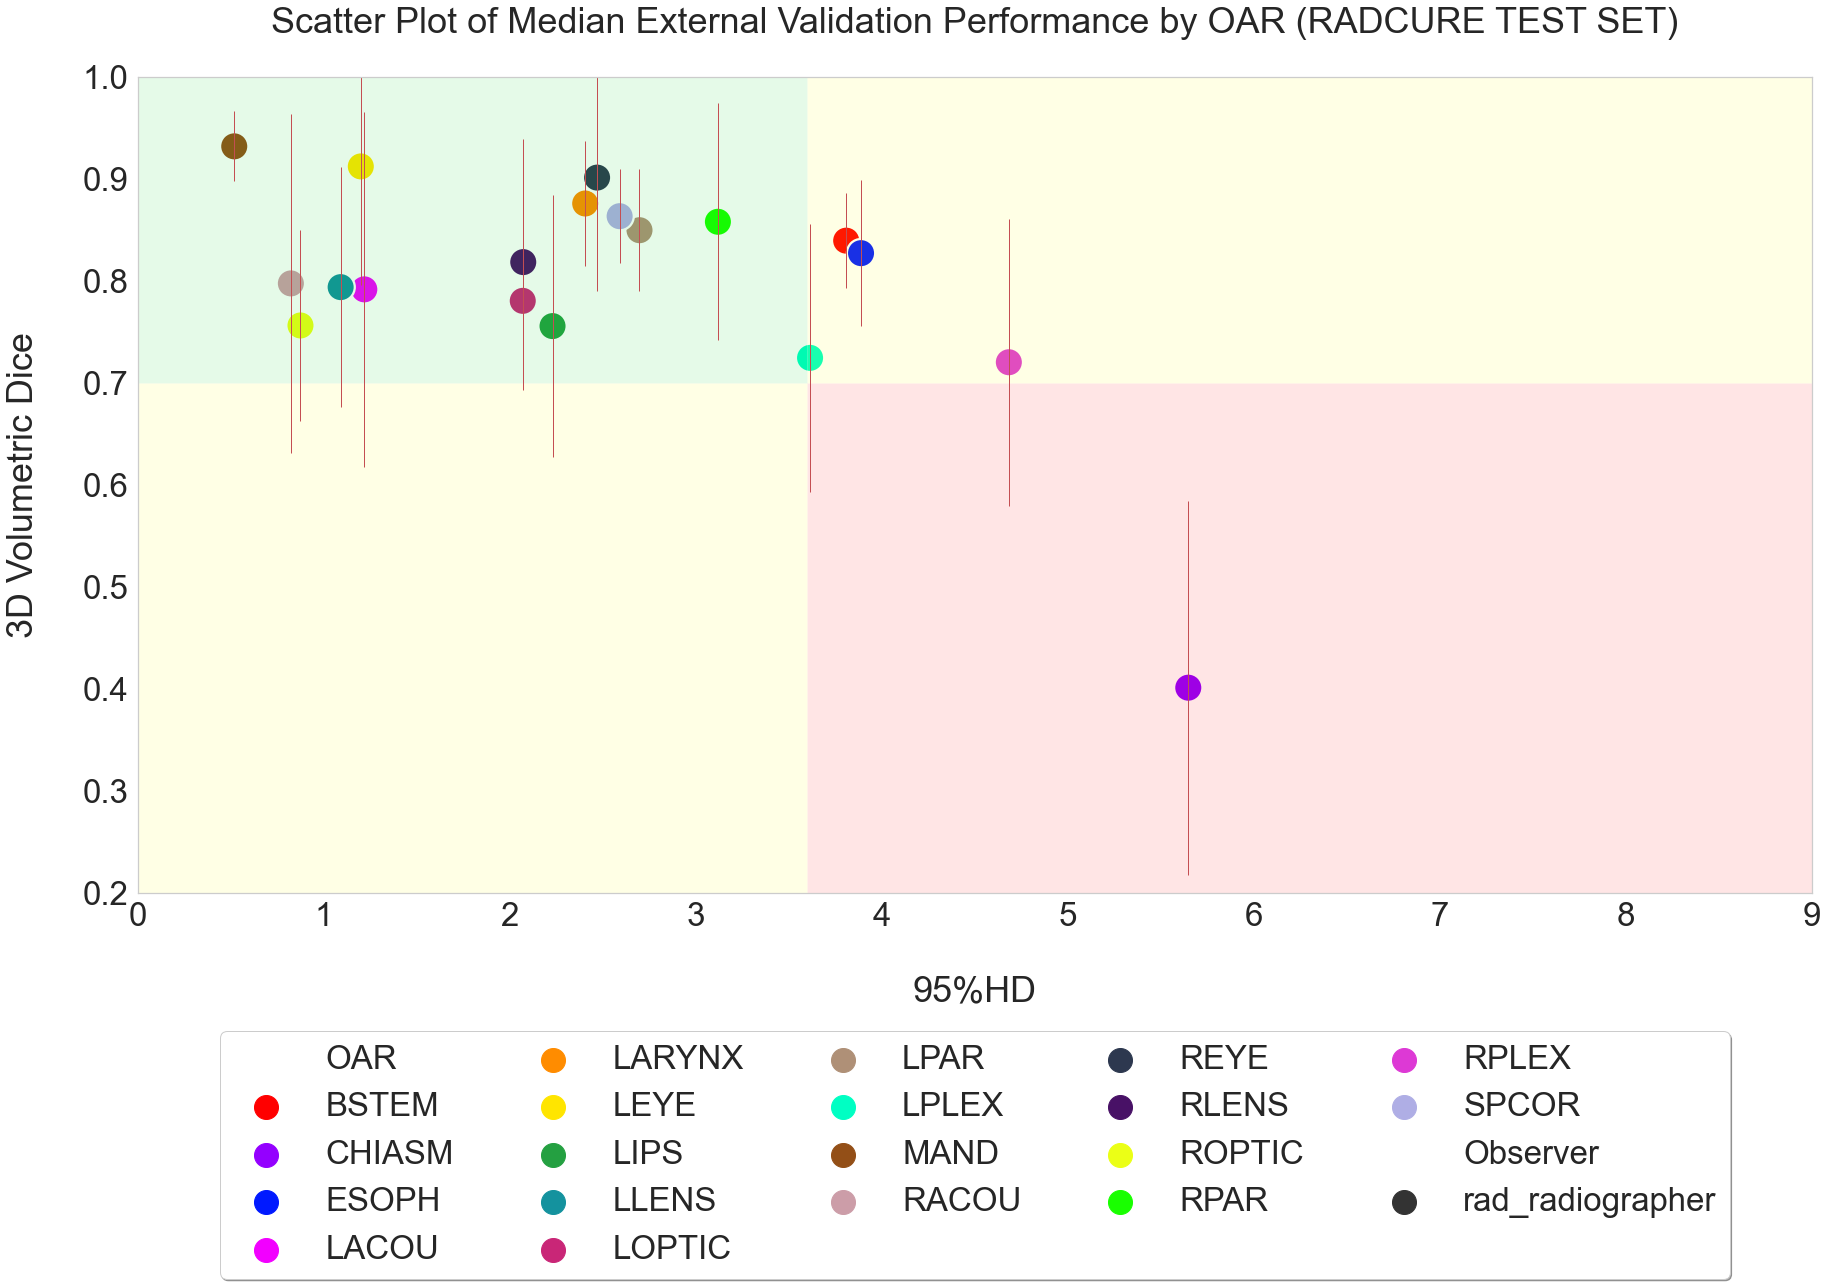

In [399]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#9400ff', '#0019ff', '#f200ff', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00',
           "#dd39d5", '#afaee5', '#b77b7b']
# colors.sort()
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR (RADCURE TEST SET)\n')
plt.ylim(0.2, 1.0)
plt.xlim(0,9)
plt.ylabel('3D Volumetric Dice\n')
plt.xlabel('\n95%HD')
exclude = []
data_ = data_median[~data_median.OAR.isin(exclude)]
include = ['rad_radiographer']
data_ = data_[data_.Observer.isin(include)]
data_.sort_values(["95HD"])
data_['95HD'] = jitter(np.array(data_['95HD']), 0)
data_.Observer = data_.Observer.astype("category")
data_.Observer.cat.set_categories(include, inplace=True)
data_.sort_values(["Observer"])
# data_.Observer = data_.Observer.astype("category")
# data_.Observer.sort(include, inplace=True)
# include = list(data_[data_['Observer']=='hn3d_radiographer']['OAR'].unique())
# data_ = data_[data_.OAR.isin(include)]


# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
data_['95HD'] = jitter(np.array(data_['95HD']), .15)
# data_['VolDice'] = jitter(np.array(data_['VolDice']), .1)
plt.errorbar(x=data_['95HD'], y=data_['VolDice'], yerr=data_['VolDice_std'], linestyle='', color='r', linewidth=1)
g = sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
g.grid()
# g.margins(0) # remove default margins (matplotlib verision 2+)
g.axhspan(.7, 1., xmin=0.0,xmax=.4,facecolor='#00d326', alpha=.1)
g.axhspan(.7, 1., xmin=0.4,xmax=1., facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.0,xmax=.4,facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.4,xmax=1., facecolor='#ff0000', alpha=.1)
#, xerr=data_['95HD_std'])
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


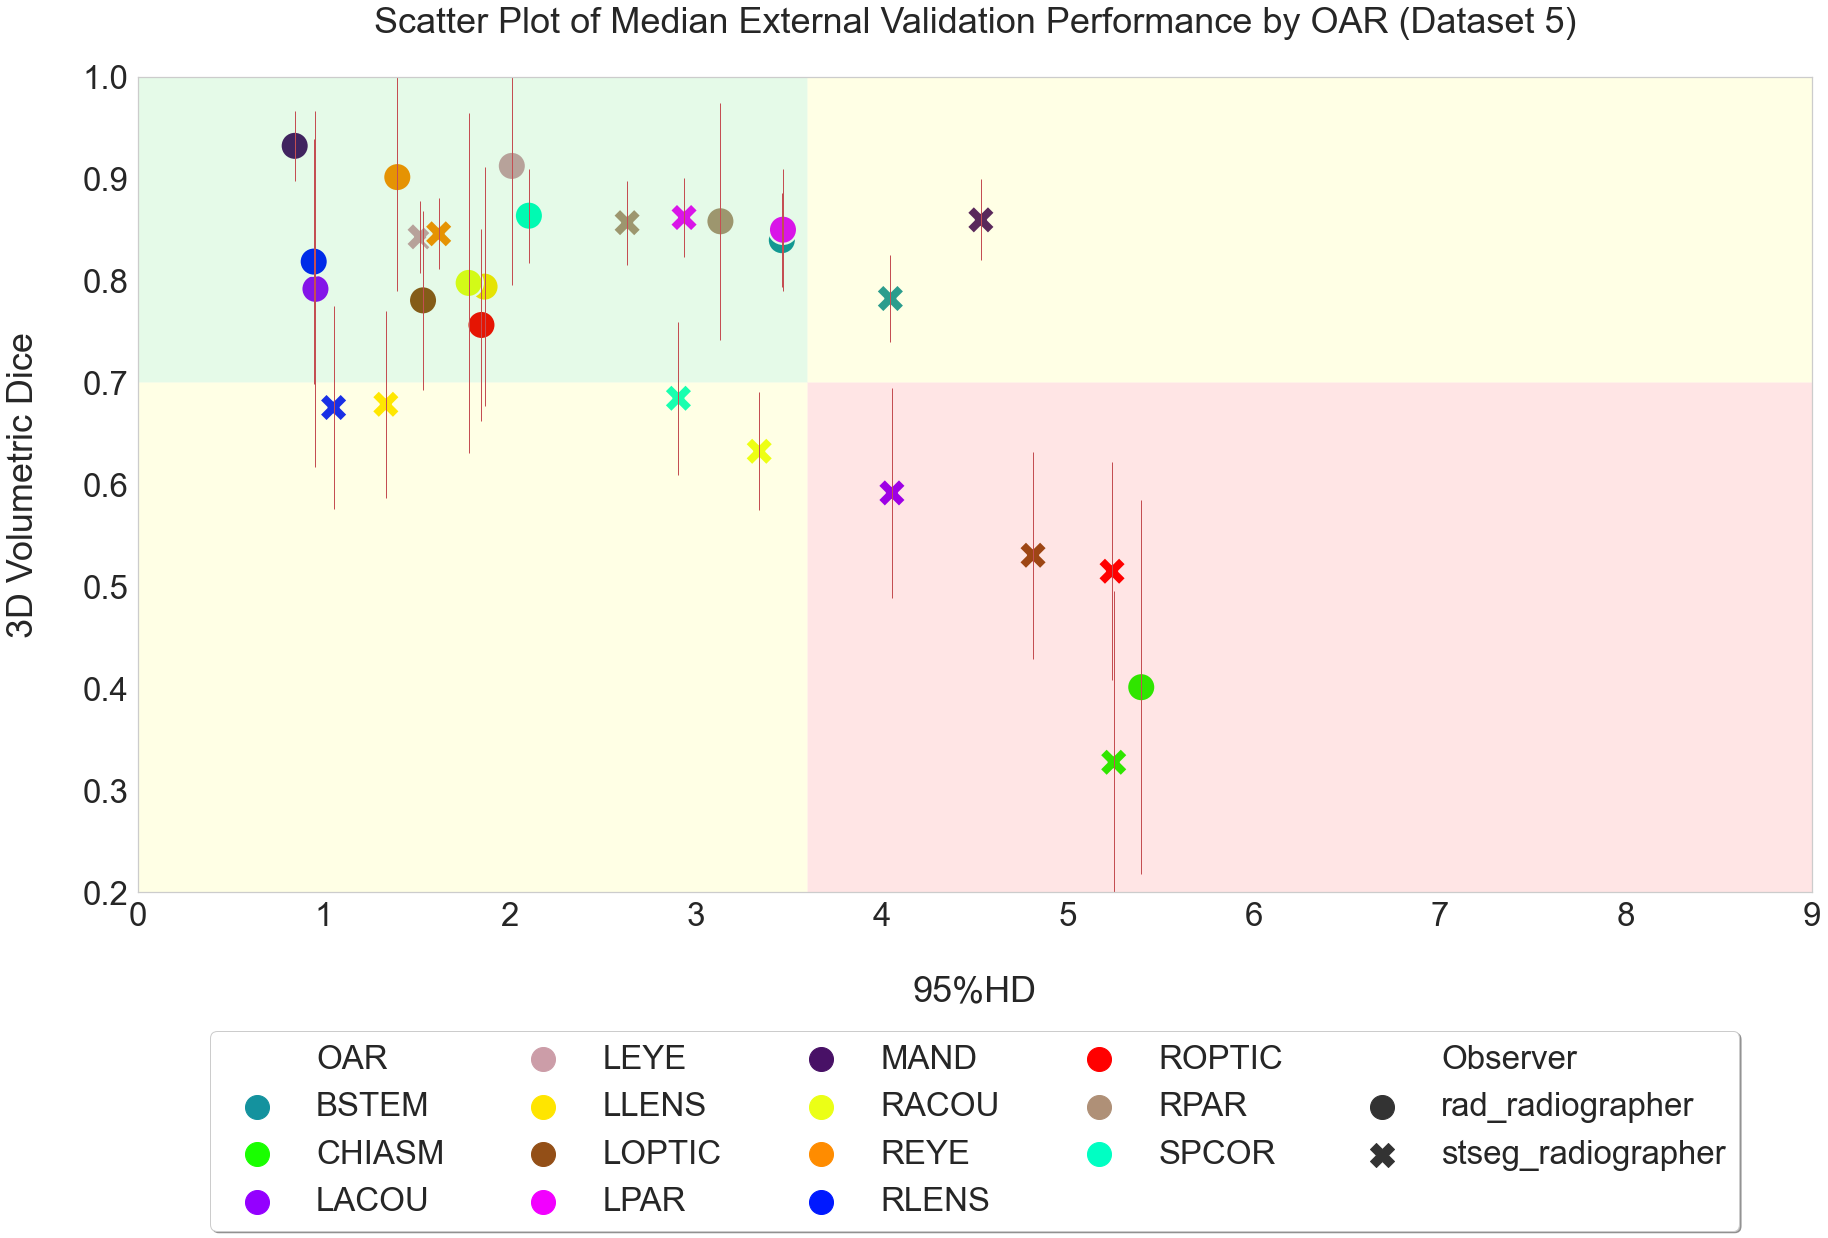

In [407]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#9400ff', '#0019ff', '#f200ff', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00',
           "#dd39d5", '#afaee5', '#b77b7b']
import random
random.shuffle(colors)
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR (Dataset 5)\n')
plt.ylim(0.2, 1.0)
plt.xlim(0,9)
plt.ylabel('3D Volumetric Dice\n')
plt.xlabel('\n95%HD')
exclude = []
data_ = data_median[~data_median.OAR.isin(exclude)]
include = ['rad_radiographer', 'stseg_radiographer']
data_ = data_[data_.Observer.isin(include)]
data_.sort_values(["95HD"])
data_['95HD'] = jitter(np.array(data_['95HD']), 0)
data_.Observer = data_.Observer.astype("category")
data_.Observer.cat.set_categories(include, inplace=True)
data_.sort_values(["Observer"])
# data_.Observer = data_.Observer.astype("category")
# data_.Observer.sort(include, inplace=True)
include = list(data_[data_['Observer']=='stseg_radiographer']['OAR'].unique())
data_ = data_[data_.OAR.isin(include)]


# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
# data_['95HD'] = jitter(np.array(data_['95HD']), .15)
# data_['VolDice'] = jitter(np.array(data_['VolDice']), .1)
plt.errorbar(x=data_['95HD'], y=data_['VolDice'], yerr=data_['VolDice_std'], linestyle='', color='r', linewidth=1)
g = sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
g.grid()
# g.margins(0) # remove default margins (matplotlib verision 2+)
g.axhspan(.7, 1., xmin=0.0,xmax=.4,facecolor='#00d326', alpha=.1)
g.axhspan(.7, 1., xmin=0.4,xmax=1., facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.0,xmax=.4,facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.4,xmax=1., facecolor='#ff0000', alpha=.1)
#, xerr=data_['95HD_std'])
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

In [390]:
np.random.seed(20)
def jitter(values,j):
    return values + np.random.normal(j,.4,values.shape)

In [338]:
# # Cusotm sort pandas dataframe
# d.MODEL = d.MODEL.astype("category")
# order=['RSANET', 'DENSEVOX', 'HIGHRESNET', 'TIRAMUSU',  'PIPOFAN', 'RESUNET', 'ANATOMY', 'VNET', 'UNET++', 'UNET3+DEEPSUP', "WOLNET"]
# order.reverse()
# d.MODEL.cat.set_categories(order, inplace=True)
# d.sort_values(["MODEL"])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


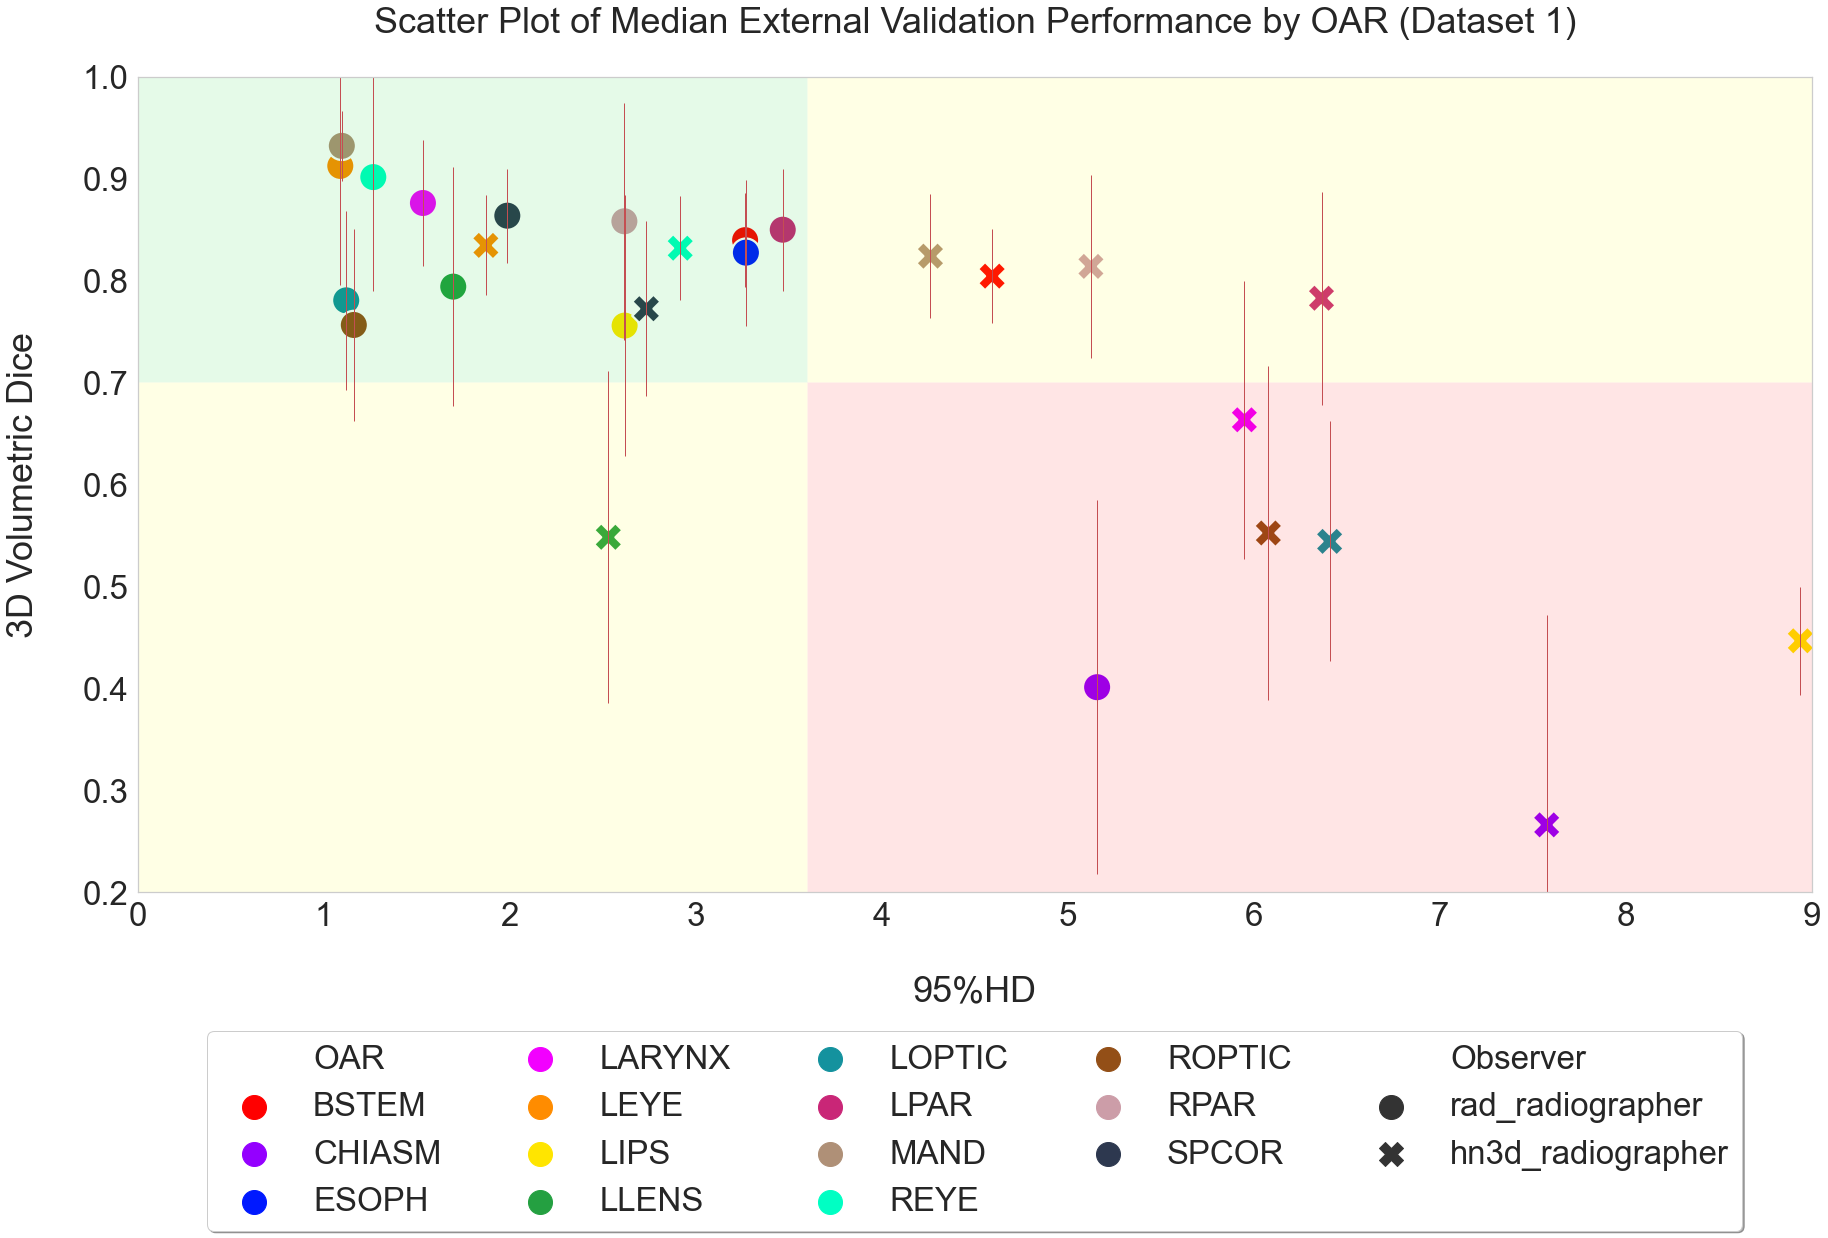

In [339]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#9400ff', '#0019ff', '#f200ff', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00',
           "#dd39d5", '#afaee5', '#b77b7b']
# colors.sort()
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR (Dataset 1)\n')
plt.ylim(0.2, 1.0)
plt.xlim(0,9)
plt.ylabel('3D Volumetric Dice\n')
plt.xlabel('\n95%HD')
exclude = ['LACOU', 'RACOU']
data_ = data_median[~data_median.OAR.isin(exclude)]
include = ['rad_radiographer', 'hn3d_radiographer']
data_ = data_[data_.Observer.isin(include)]
data_.sort_values(["95HD"])
data_['95HD'] = jitter(np.array(data_['95HD']), 0)
data_.Observer = data_.Observer.astype("category")
data_.Observer.cat.set_categories(include, inplace=True)
data_.sort_values(["Observer"])
# data_.Observer = data_.Observer.astype("category")
# data_.Observer.sort(include, inplace=True)
include = list(data_[data_['Observer']=='hn3d_radiographer']['OAR'].unique())
data_ = data_[data_.OAR.isin(include)]


# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
# data_['95HD'] = jitter(np.array(data_['95HD']), .15)
# data_['VolDice'] = jitter(np.array(data_['VolDice']), .1)
plt.errorbar(x=data_['95HD'], y=data_['VolDice'], yerr=data_['VolDice_std'], linestyle='', color='r', linewidth=1)
g = sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
g.grid()
# g.margins(0) # remove default margins (matplotlib verision 2+)
g.axhspan(.7, 1., xmin=0.0,xmax=.4,facecolor='#00d326', alpha=.1)
g.axhspan(.7, 1., xmin=0.4,xmax=1., facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.0,xmax=.4,facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.4,xmax=1., facecolor='#ff0000', alpha=.1)
#, xerr=data_['95HD_std'])
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

In [331]:
np.random.seed(20)
def jitter(values,j):
    return values + np.random.normal(j,.7,values.shape)

In [332]:
np.random.normal(0.,0.4,10)

array([ 0.35355725,  0.07834601,  0.14301461, -0.93730476, -0.43393303,
        0.22387852,  0.37578774, -0.39139242,  0.20123874,  0.16256579])

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


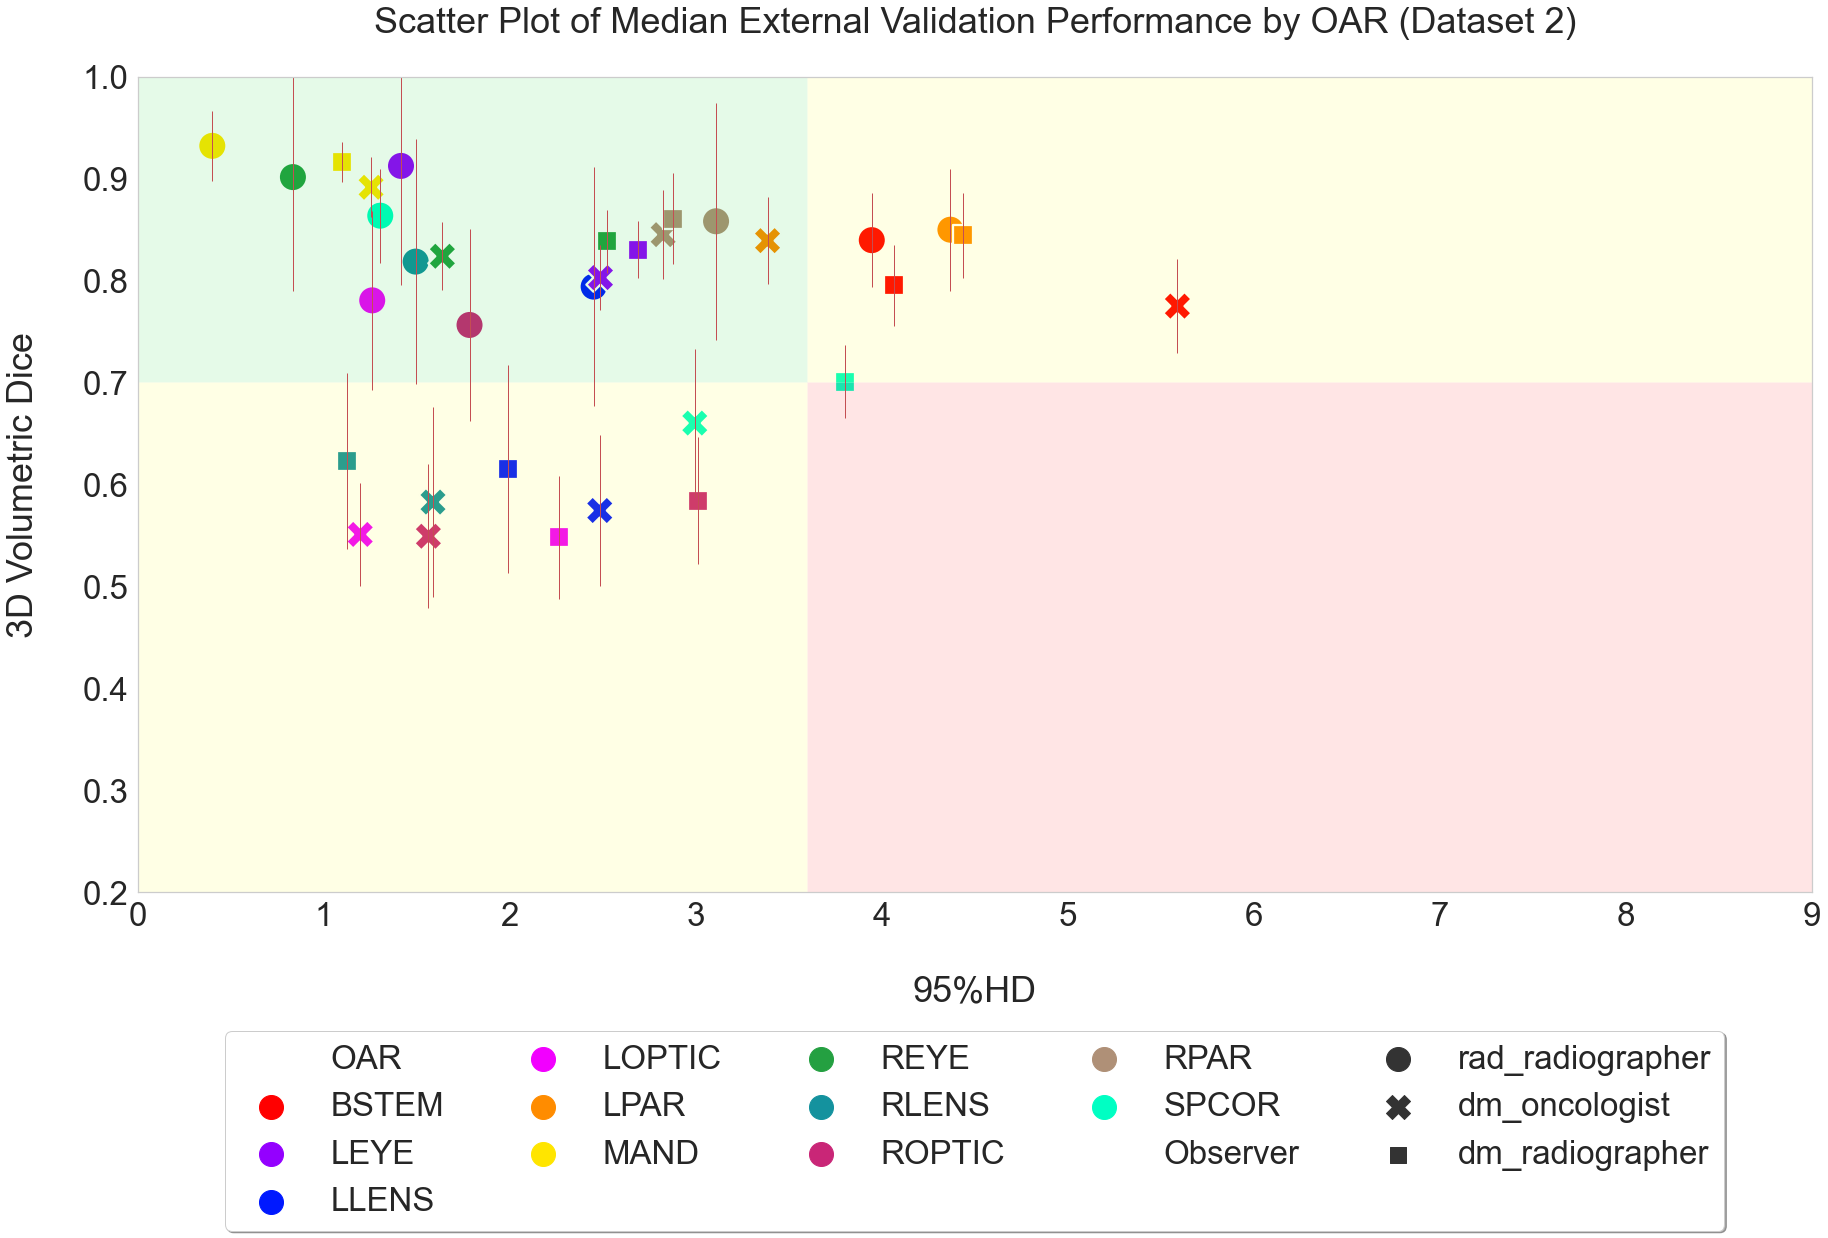

In [334]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#9400ff', '#0019ff', '#f200ff', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00',
           "#dd39d5", '#afaee5', '#b77b7b']
# colors.sort()
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR (Dataset 2)\n')
plt.ylim(0.2, 1.0)
plt.xlim(0,9)
plt.ylabel('3D Volumetric Dice\n')
plt.xlabel('\n95%HD')
exclude = ['LACOU', 'RACOU']
data_ = data_median[~data_median.OAR.isin(exclude)]
include = ['rad_radiographer', 'dm_oncologist','dm_radiographer']
data_ = data_[data_.Observer.isin(include)]
data_.sort_values(["95HD"])
data_['95HD'] = jitter(np.array(data_['95HD']), 0)
data_.Observer = data_.Observer.astype("category")
data_.Observer.cat.set_categories(include, inplace=True)
data_.sort_values(["Observer"])
inc = ['dm_oncologist','dm_radiographer']
include = list(data_[data_.Observer.isin(inc)]['OAR'].unique())
data_ = data_[data_.OAR.isin(include)]

# data_.Observer = df.Tm.astype("category")
# data_.Observer.set_categories(include, inplace=True)
# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
# data_['95HD'] = jitter(np.array(data_['95HD']), .9)
# data_['VolDice'] = jitter(np.array(data_['VolDice']), .1)
plt.errorbar(x=data_['95HD'], y=data_['VolDice'], yerr=data_['VolDice_std'], linestyle='', color='r', linewidth=1)
g = sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
g.grid()
# g.margins(0) # remove default margins (matplotlib verision 2+)
g.axhspan(.7, 1., xmin=0.0,xmax=.4,facecolor='#00d326', alpha=.1)
g.axhspan(.7, 1., xmin=0.4,xmax=1., facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.0,xmax=.4,facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.4,xmax=1., facecolor='#ff0000', alpha=.1)
#, xerr=data_['95HD_std'])
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

In [308]:
np.random.seed(20)
def jitter(values,j):
    return values + np.random.normal(j,.6,values.shape)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


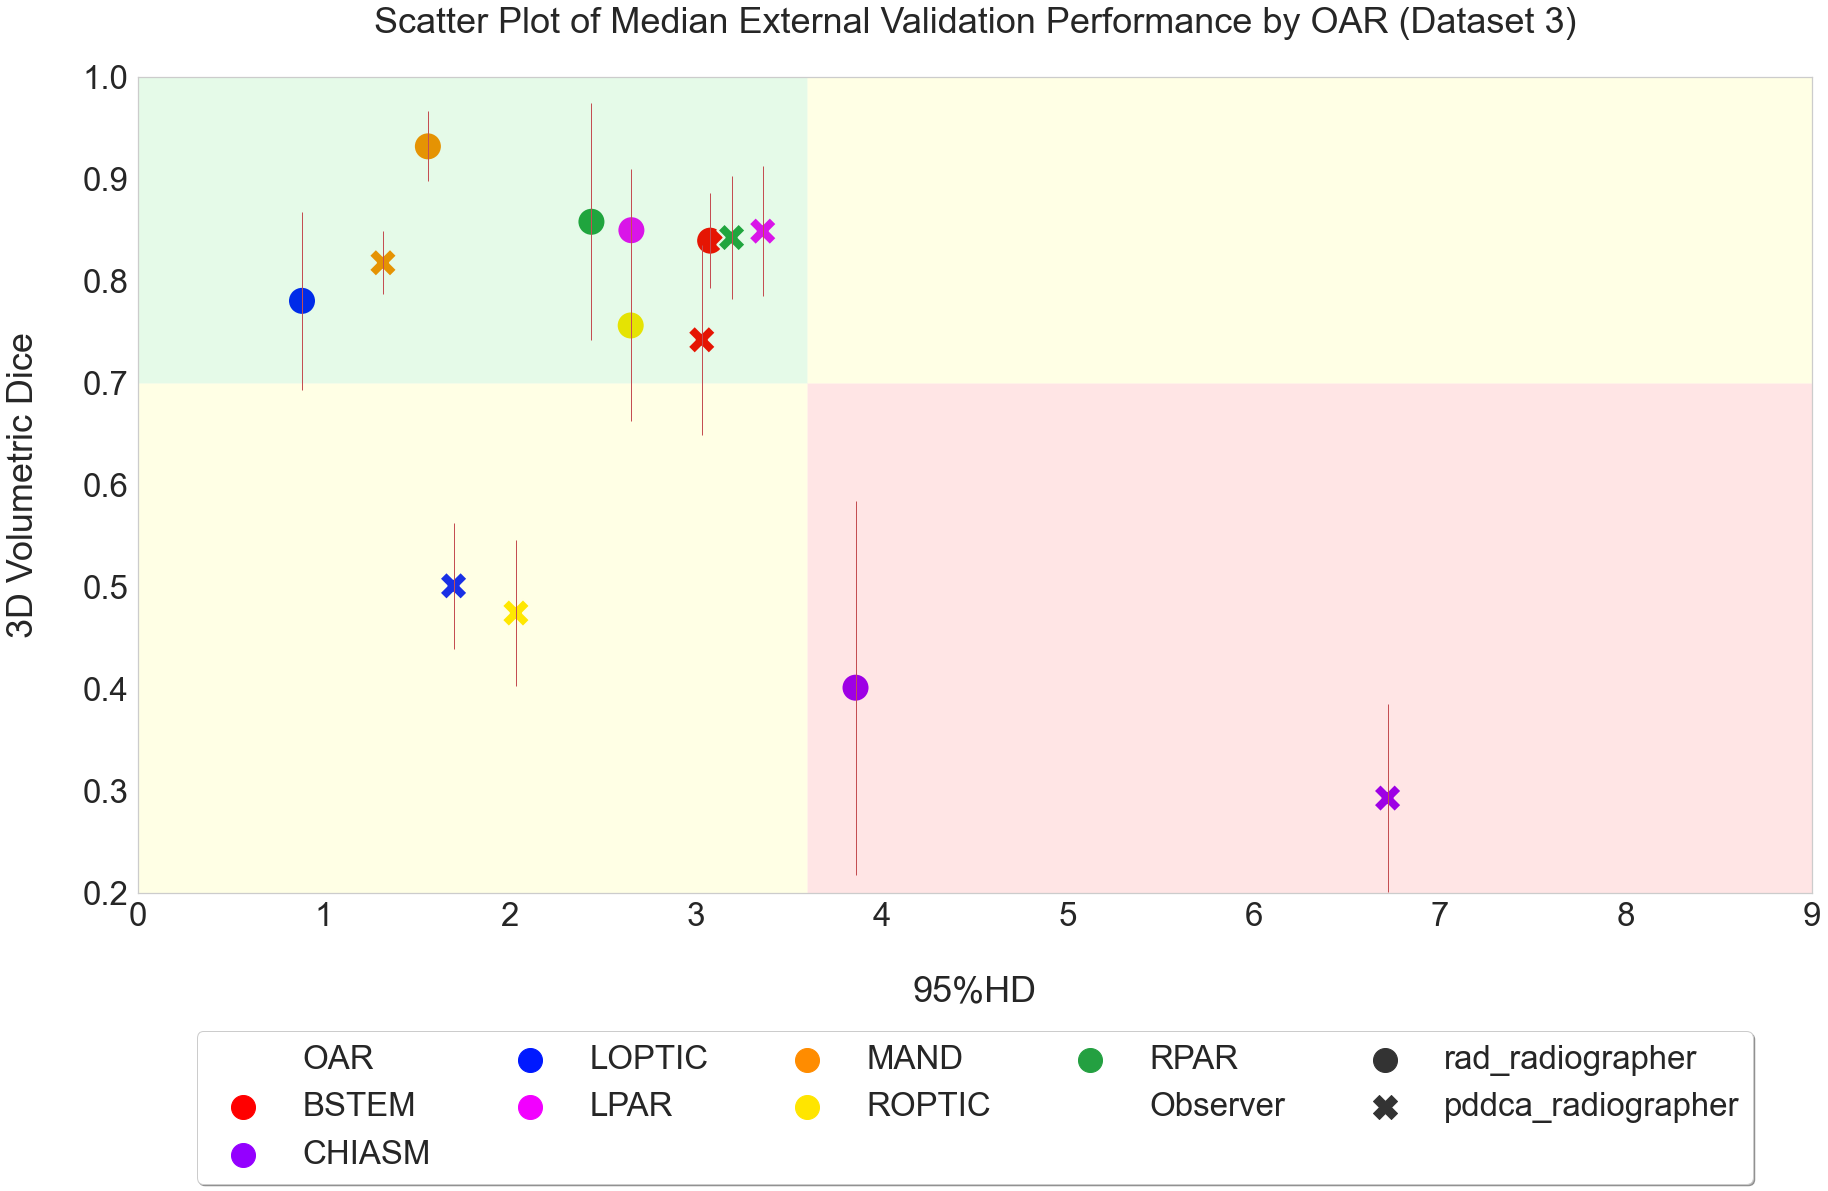

In [311]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#9400ff', '#0019ff', '#f200ff', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00',
           "#dd39d5", '#afaee5', '#b77b7b']
# colors.sort()
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR (Dataset 3)\n')
plt.ylim(0.2, 1.0)
plt.xlim(0,9)
plt.ylabel('3D Volumetric Dice\n')
plt.xlabel('\n95%HD')
exclude = ['LACOU', 'RACOU']
data_ = data_median[~data_median.OAR.isin(exclude)]
include = ['rad_radiographer', 'pddca_radiographer']
data_ = data_[data_.Observer.isin(include)]
data_.Observer = data_.Observer.astype("category")
data_.Observer.cat.set_categories(include, inplace=True)
data_.sort_values(["Observer"])
inc = ['pddca_radiographer']
include = list(data_[data_.Observer.isin(inc)]['OAR'].unique())
data_ = data_[data_.OAR.isin(include)]

# data_.Observer = df.Tm.astype("category")
# data_.Observer.set_categories(include, inplace=True)
# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
data_['95HD'] = jitter(np.array(data_['95HD']), .0)
# data_['VolDice'] = jitter(np.array(data_['VolDice']), .1)
plt.errorbar(x=data_['95HD'], y=data_['VolDice'], yerr=data_['VolDice_std'], linestyle='', color='r', linewidth=1)
g = sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
g.grid()
# g.margins(0) # remove default margins (matplotlib verision 2+)
g.axhspan(.7, 1., xmin=0.0,xmax=.4,facecolor='#00d326', alpha=.1)
g.axhspan(.7, 1., xmin=0.4,xmax=1., facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.0,xmax=.4,facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.4,xmax=1., facecolor='#ff0000', alpha=.1)
#, xerr=data_['95HD_std'])
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


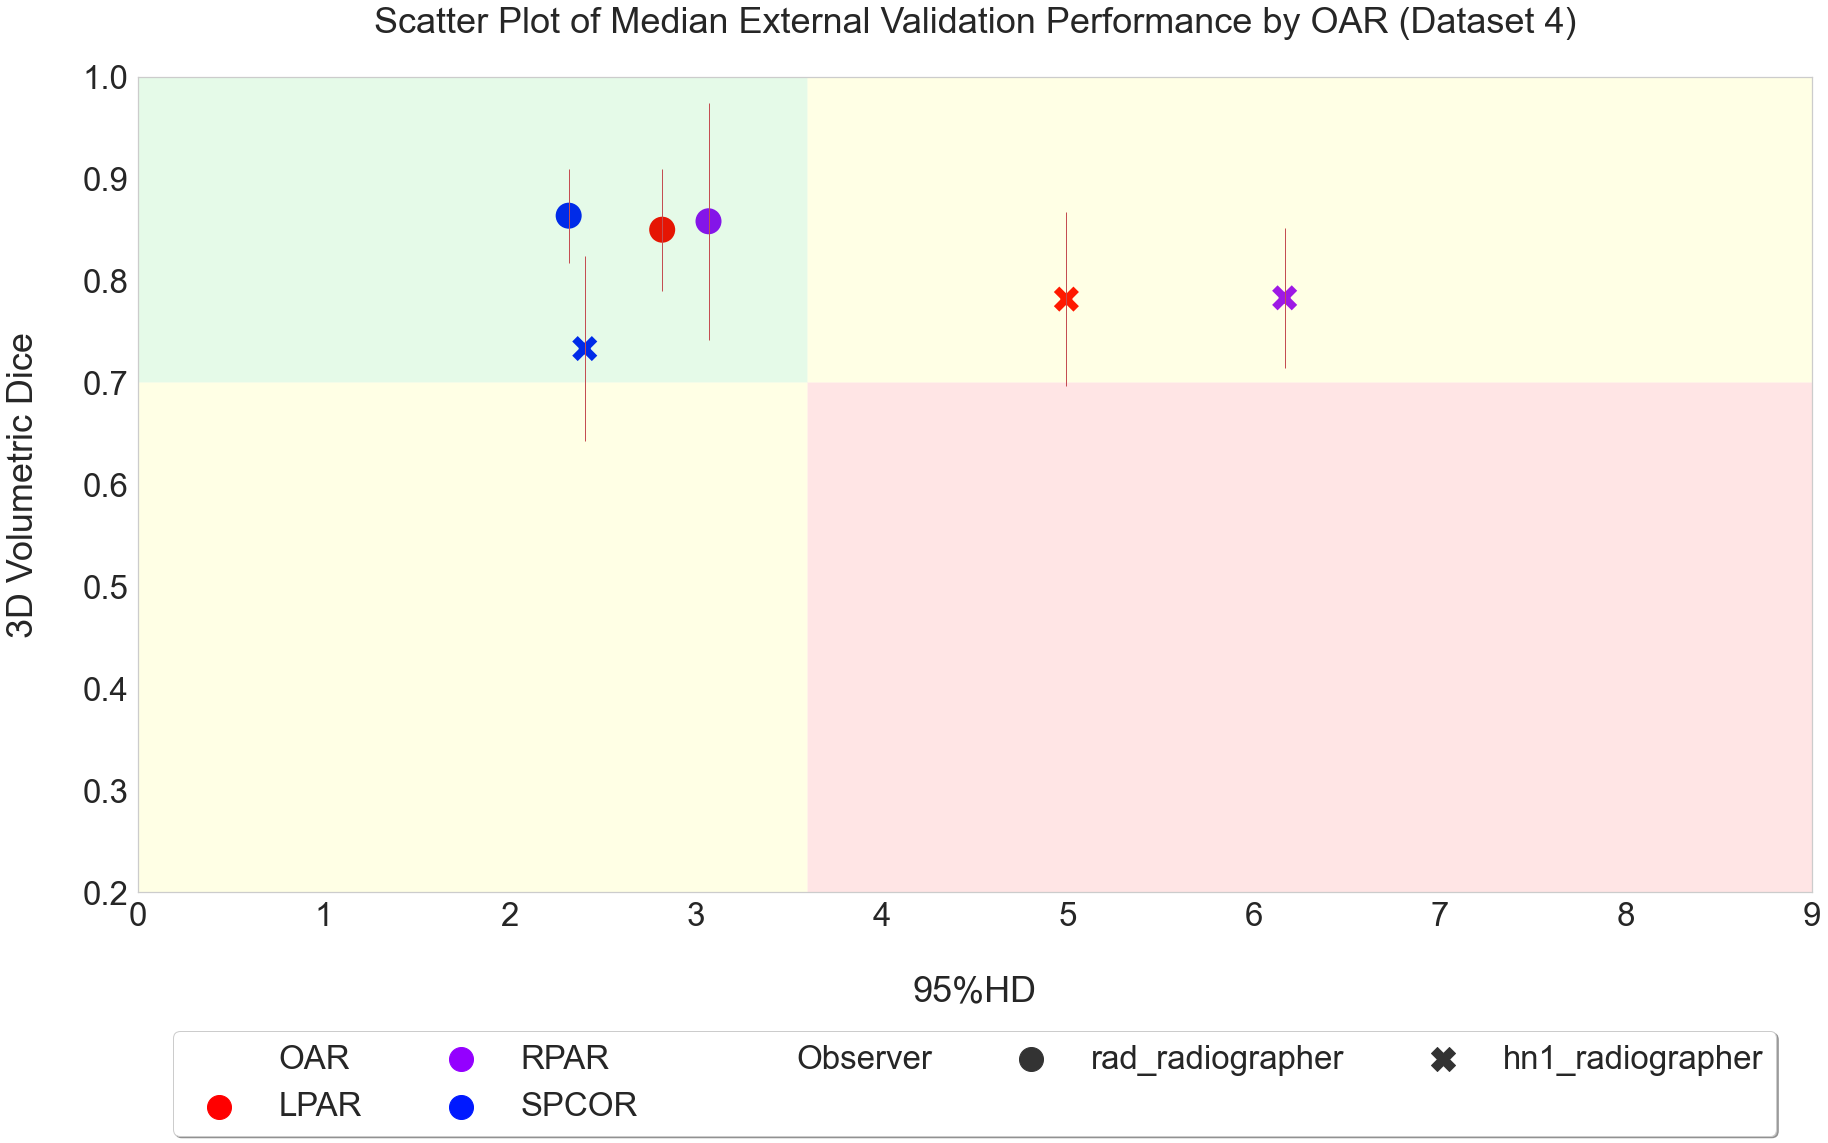

In [317]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3)  # crazy big
sea.set_style("whitegrid")
# list of # colours...
colors  = ['#ff0000', '#9400ff', '#0019ff', '#f200ff', '#ff8c00',
           '#ffe500', '#24a041', '#14929e', '#c92677', '#af9077', '#00ffc3',
           '#934f17', '#cc9da8', '#2d384f', '#481166', "#ebff16", '#19ff00',
           "#dd39d5", '#afaee5', '#b77b7b']
# colors.sort()
sea.set_palette(sea.color_palette(colors))
sea.color_palette()
plt.title('Scatter Plot of Median External Validation Performance by OAR (Dataset 4)\n')
plt.ylim(0.2, 1.0)
plt.xlim(0,9)
plt.ylabel('3D Volumetric Dice\n')
plt.xlabel('\n95%HD')
exclude = ['LACOU', 'RACOU']
data_ = data_median[~data_median.OAR.isin(exclude)]
include = ['rad_radiographer', 'hn1_radiographer']
data_ = data_[data_.Observer.isin(include)]
data_.Observer = data_.Observer.astype("category")
data_.Observer.cat.set_categories(include, inplace=True)
data_.sort_values(["Observer"])
inc = ['hn1_radiographer']
include = list(data_[data_.Observer.isin(inc)]['OAR'].unique())
data_ = data_[data_.OAR.isin(include)]

# data_.Observer = df.Tm.astype("category")
# data_.Observer.set_categories(include, inplace=True)
# sizes = data_.groupby('OAR', as_index=False)['Counts'].sum()
# get sizes 
# obs = list(data_['Observer'])
# obu = list(data_['Observer'].unique())
# data_['Counts']*=100
data_['95HD'] = jitter(np.array(data_['95HD']), 0)
# data_['VolDice'] = jitter(np.array(data_['VolDice']), .1)
plt.errorbar(x=data_['95HD'], y=data_['VolDice'], yerr=data_['VolDice_std'], linestyle='', color='r', linewidth=1)
g = sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# sea.scatterplot( data=data_, y='VolDice', x='95HD', hue='OAR', style='Observer', s=800)
# lh.set_sizes([50])
g.grid()
# g.margins(0) # remove default margins (matplotlib verision 2+)
g.axhspan(.7, 1., xmin=0.0,xmax=.4,facecolor='#00d326', alpha=.1)
g.axhspan(.7, 1., xmin=0.4,xmax=1., facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.0,xmax=.4,facecolor='#ffff00', alpha=.1)
g.axhspan(0, .7, xmin=0.4,xmax=1., facecolor='#ff0000', alpha=.1)
#, xerr=data_['95HD_std'])
# ax.axhspan(9, 12, facecolor='red', alpha=0.5)
leg = g.legend(markerscale=4, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5) #'lower center', bbox_to_anchor=(-0.15, -.10))
# for i, val in enumerate(leg.legendHandles):
#     val.set_markersize(50)

In [316]:
include

['LPAR', 'RPAR', 'SPCOR']

In [1]:
########################
# This section reads in .csv and modifies it...
import pandas as pd
dat = pd.read_csv('/Users/joemarsilla/Median_Performance_External_validation_01052022.csv')

In [2]:
dat_transposed = dat.T 

In [3]:
dat_transposed

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
OAR,BSTEM,CHIASM,ESOPH,LACOU,LARYNX,LEYE,LIPS,LLENS,LOPTIC,LPAR,...,LEYE,LIPS,LLENS,LOPTIC,LPAR,MAND,REYE,ROPTIC,RPAR,SPCOR
VolDice,0.839614,0.401028,0.827362,0.791837,0.876082,0.912462,0.755798,0.79403,0.780558,0.849878,...,0.834467,0.446542,0.548105,0.54409,0.782635,0.823931,0.831729,0.552312,0.813885,0.772322
95HD,3.0,5.09902,3.162278,1.573132,2.236068,1.414214,2.44949,1.414214,1.414214,3.316625,...,2.828427,8.602325,2.129837,6.480741,6.403124,4.294543,2.44949,6.039669,5.744563,3.0
SurfDist,1.249724,1.238545,1.07079,0.670757,0.922978,0.53725,0.946567,0.530341,0.487591,1.230583,...,1.079672,1.258218,0.964937,1.546452,1.811453,1.135487,1.089068,1.632609,1.444092,1.219693
VolDice_std,0.0464,0.183534,0.071651,0.174297,0.061593,0.116407,0.128317,0.117413,0.08761,0.059962,...,0.049086,0.052815,0.162833,0.117645,0.104357,0.060866,0.051261,0.163403,0.08985,0.08583
95HD_std,0.883294,3.943288,5.481063,9.785202,1.379823,2.984045,1.206307,0.325998,1.291983,3.436427,...,0.865744,2.593452,0.917005,5.282867,4.405097,4.47021,0.644436,5.141368,4.855924,4.349147
SurfDist_std,0.407904,1.468696,0.570488,8.4142,1.484772,0.216258,NaN,NaN,0.293001,0.714377,...,0.26483,0.209269,0.432837,1.012765,1.142929,0.599648,0.25583,1.996195,0.984204,0.769538
Observer,rad_radiographer,rad_radiographer,rad_radiographer,rad_radiographer,rad_radiographer,rad_radiographer,rad_radiographer,rad_radiographer,rad_radiographer,rad_radiographer,...,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer,hn3d_radiographer
Counts,59,59,59,59,59,59,59,59,59,59,...,46,5,9,27,71,60,49,28,71,83


In [4]:
oars= list(dat.OAR.unique())

In [5]:
oars

['BSTEM',
 'CHIASM',
 'ESOPH',
 'LACOU',
 'LARYNX',
 'LEYE',
 'LIPS',
 'LLENS',
 'LOPTIC',
 'LPAR',
 'LPLEX',
 'MAND',
 'RACOU',
 'REYE',
 'RLENS',
 'ROPTIC',
 'RPAR',
 'RPLEX',
 'SPCOR']

In [6]:
obs = list(dat.Observer.unique())
oars= list(dat.OAR.unique())
d_c = {'OAR':oars}
for ob in obs:
    d = dat[dat['Observer']==ob]
    dd_c = []
    # dd_h = []
    for oar in oars:
        oa = list(d.OAR.unique())
        if oar in oa:
            dd_c.append(f"{d[d['OAR']==oar]['Counts'].iloc[0]}")
            # dd_h.append(f"{np.round(d[d['OAR']==oar]['95HD'].iloc[0],2)}\u00B1{np.round(d[d['OAR']==oar]['95HD_std'].iloc[0],2)}")
        else:
            dd_c.append('')
            # dd_h.append('')
    d_c[ob] = dd_c
    # d_h[ob] = dd_h

In [7]:
count_dframe = pd.DataFrame.from_dict(d_c)

In [8]:
count_dframe

,OAR,rad_radiographer,stseg_radiographer,dm_oncologist,dm_radiographer,pddca_radiographer,hn1_radiographer,hn3d_radiographer
0,BSTEM,59,50,33,33,52,,82
1,CHIASM,59,50,,,52,,61
2,ESOPH,59,,,,,,12
3,LACOU,59,50,,,,,
4,LARYNX,59,,,,,,47
5,LEYE,59,50,33,33,,,46
6,LIPS,59,,,,,,5
7,LLENS,59,50,33,33,,,9
8,LOPTIC,59,50,33,33,52,,27
9,LPAR,59,50,33,33,52,94,71


In [452]:
obs = list(dat.Observer.unique())
oars= list(dat.OAR.unique())

d_v = {'OAR':oars}
d_h = {'OAR':oars}
for ob in obs:
    d = dat[dat['Observer']==ob]
    dd_v = []
    dd_h = []
    for oar in oars:
        oa = list(d.OAR.unique())
        if oar in oa:
            dd_v.append(f"{np.round(d[d['OAR']==oar]['VolDice'].iloc[0],2)}\u00B1{np.round(d[d['OAR']==oar]['VolDice_std'].iloc[0],2)}")
            dd_h.append(f"{np.round(d[d['OAR']==oar]['95HD'].iloc[0],2)}\u00B1{np.round(d[d['OAR']==oar]['95HD_std'].iloc[0],2)}")
        else:
            dd_v.append('')
            dd_h.append('')
    d_v[ob] = dd_v
    d_h[ob] = dd_h
    
        

In [453]:
d[d['OAR']==oar]['VolDice'].iloc[0]

0.772322476

In [454]:
d

,OAR,VolDice,95HD,SurfDist,VolDice_std,95HD_std,SurfDist_std,Observer,Counts
65,BSTEM,0.804331,4.123106,1.472860,0.045814,1.772129,0.423861,hn3d_radiographer,82
66,CHIASM,0.265949,7.259408,1.621328,0.206357,3.750716,2.072463,hn3d_radiographer,61
67,ESOPH,0.531455,14.208267,3.093267,0.213896,9.126893,3.631119,hn3d_radiographer,12
68,LARYNX,0.663374,6.000000,2.132964,0.136395,2.708326,1.254351,hn3d_radiographer,47
69,LEYE,0.834467,2.828427,1.079672,0.049086,0.865744,0.264830,hn3d_radiographer,46
70,LIPS,0.446542,8.602325,1.258218,0.052815,2.593452,0.209269,hn3d_radiographer,5
71,LLENS,0.548105,2.129837,0.964937,0.162833,0.917005,0.432837,hn3d_radiographer,9
72,LOPTIC,0.544090,6.480741,1.546452,0.117645,5.282867,1.012765,hn3d_radiographer,27
73,LPAR,0.782635,6.403124,1.811453,0.104357,4.405097,1.142929,hn3d_radiographer,71
74,MAND,0.823931,4.294543,1.135487,0.060866,4.470210,0.599648,hn3d_radiographer,60


In [455]:
vol_dframe = pd.DataFrame.from_dict(d_v)

In [463]:
vol_dframe.to_csv('/Users/joemarsilla/Mean_OAR_3DVoldice_by_dataset_01062021.csv')

In [464]:
vol_dframe

,OAR,rad_radiographer,stseg_radiographer,dm_oncologist,dm_radiographer,pddca_radiographer,hn1_radiographer,hn3d_radiographer
0,BSTEM,0.84±0.05,0.78±0.04,0.77±0.05,0.8±0.04,0.74±0.09,,0.8±0.05
1,CHIASM,0.4±0.18,0.33±0.17,,,0.29±0.09,,0.27±0.21
2,ESOPH,0.83±0.07,,,,,,0.53±0.21
3,LACOU,0.79±0.17,0.59±0.1,,,,,
4,LARYNX,0.88±0.06,,,,,,0.66±0.14
5,LEYE,0.91±0.12,0.84±0.04,0.8±0.03,0.83±0.03,,,0.83±0.05
6,LIPS,0.76±0.13,,,,,,0.45±0.05
7,LLENS,0.79±0.12,0.68±0.09,0.57±0.07,0.62±0.1,,,0.55±0.16
8,LOPTIC,0.78±0.09,0.53±0.1,0.55±0.05,0.55±0.06,0.5±0.06,,0.54±0.12
9,LPAR,0.85±0.06,0.86±0.04,0.84±0.04,0.84±0.04,0.85±0.06,0.78±0.09,0.78±0.1


In [457]:
hd_dframe = pd.DataFrame.from_dict(d_h)

In [465]:
hd_dframe

,OAR,rad_radiographer,stseg_radiographer,dm_oncologist,dm_radiographer,pddca_radiographer,hn1_radiographer,hn3d_radiographer
0,BSTEM,3.0±0.88,3.74±0.85,4.12±0.73,3.74±0.68,4.0±2.16,,4.12±1.77
1,CHIASM,5.1±3.94,5.14±3.53,,,6.4±2.62,,7.26±3.75
2,ESOPH,3.16±5.48,,,,,,14.21±9.13
3,LACOU,1.57±9.79,3.74±1.14,,,,,
4,LARYNX,2.24±1.38,,,,,,6.0±2.71
5,LEYE,1.41±2.98,1.41±0.39,2.24±0.16,2.24±0.15,,,2.83±0.87
6,LIPS,2.45±1.21,,,,,,8.6±2.59
7,LLENS,1.41±0.33,1.41±0.37,2.0±0.31,1.65±0.55,,,2.13±0.92
8,LOPTIC,1.41±1.29,5.05±2.19,2.24±1.53,2.24±1.88,2.63±4.44,,6.48±5.28
9,LPAR,3.32±3.44,3.0±1.73,3.32±2.77,3.74±5.17,3.16±1.72,4.9±3.52,6.4±4.41


In [462]:
hd_dframe.to_csv('/Users/joemarsilla/Mean_OAR_95HD_by_dataset_01062021.csv')

#### colors[9]

In [245]:
data_

,OAR,VolDice,95HD,Observer,Counts
6,LIPS,0.446542,8.602325,hn3d_radiographer,5
7,LLENS,0.548105,2.129837,hn3d_radiographer,9
2,ESOPH,0.531455,14.208267,hn3d_radiographer,12
8,LOPTIC,0.544090,6.480741,hn3d_radiographer,27
13,ROPTIC,0.552312,6.039669,hn3d_radiographer,28
...,...,...,...,...,...
0,BSTEM,0.804331,4.123106,hn3d_radiographer,82
15,SPCOR,0.772322,3.000000,hn3d_radiographer,83
3,RPAR,0.783042,5.385165,hn1_radiographer,93
1,LPAR,0.781793,4.898979,hn1_radiographer,94


In [290]:
plt.figure(figsize=(30,15))
sea.set(font_scale=3) 
d = data_[['OAR','Counts']].reset_index()
sea.heatmap(d)

ValueError: could not convert string to float: 'LIPS'

<Figure size 2160x1080 with 0 Axes>

In [210]:
sizes['Counts']

0     2000
1     1130
2      120
3      470
4     1120
5       50
6      750
7     1450
8     2830
9     1700
10    1150
11     660
12    1460
13    2820
14    2680
Name: Counts, dtype: int64

In [125]:
leg.legendHandles[0]

AttributeError: 'PathCollection' object has no attribute 'marker'

In [61]:
observer = ['pddca_radiologist' for p in range(len(p_data))]
p_data['Observer'] = observer
observer = ['hn3d_radiologist' for p in range(len(h_data))]
h_data['Observer'] = observer
observer = ['hn1_radiologist' for p in range(len(m_data))]
m_data['Observer'] = observer

In [73]:
m_data.head()

,OAR,OAR_HN1,Patient,VolDice,95HD,SurfDice,Observer
0,SPCOR,SPINAL-CORD,HN1006,0.747446,2.236068,1.104181,hn1_radiologist
1,LPAR,PAROTID-LEFT,HN1006,0.830148,3.605551,0.808695,hn1_radiologist
2,RPAR,PAROTID-RIGHT,HN1006,0.819642,4.000000,0.872375,hn1_radiologist
3,LACOU,COCHLEA-LEFT,HN1006,0.145098,10.295630,4.983077,hn1_radiologist
4,RACOU,COCHLEA-RIGHT,HN1006,0.131868,11.443335,5.686941,hn1_radiologist


In [254]:
d = d_data.drop(columns=['OAR_Deepmind'])
p = p_data.drop(columns=['OAR_PDDCA'])
m = m_data.drop(columns=['OAR_HN1'])
h = h_data.copy()

In [255]:
data = pd.concat([r_data,d,p,m,h])

In [264]:
data.head()
data['Counts'] = np.ones(len(data))

In [272]:
data = data.drop(columns=['Observer'])

In [141]:
# Calculate number of unique OARs in set...
u_oars = []
n_scans = []
obs = list(data['Observer'].unique())
exclude = ['LACOU', 'RACOU']
data_i = data[~data.OAR.isin(exclude)]
for ob in obs:
    a = data_i[data_i['Observer']==ob]
    u_oars.append((list(a['OAR'].unique()), len(list(a['OAR'].unique()))))
    n_scans.append(len(list(a['Patient'].unique())))

In [153]:
obs.index('radiographer')

0

In [244]:
u_oars

[(['BSTEM',
   'LLENS',
   'RLENS',
   'MAND',
   'LOPTIC',
   'ROPTIC',
   'LPAR',
   'RPAR',
   'LEYE',
   'REYE',
   'SPCOR'],
  11),
 (['BSTEM',
   'LLENS',
   'RLENS',
   'MAND',
   'LOPTIC',
   'ROPTIC',
   'LPAR',
   'RPAR',
   'LEYE',
   'REYE',
   'SPCOR'],
  11),
 (['BSTEM', 'CHIASM', 'MAND', 'LOPTIC', 'ROPTIC', 'LPAR', 'RPAR'], 7),
 (['SPCOR', 'LPAR', 'RPAR'], 3),
 (['BSTEM',
   'SPCOR',
   'MAND',
   'LPAR',
   'RPAR',
   'LOPTIC',
   'ROPTIC',
   'CHIASM',
   'LARYNX',
   'LEYE',
   'REYE',
   'ESOPH',
   'LIPS',
   'LLENS'],
  14)]

In [152]:
list(data_['Observer'].unique())

['dm_oncologist',
 'dm_radiographer',
 'pddca_radiographer',
 'hn1_radiographer',
 'hn3d_radiographer']

In [16]:
import matplotlib.pyplot as plt

In [101]:
data.groupby('OAR', as_index=False)['VolDice'].mean()

,OAR,VolDice
0,BSTEM,0.775480
1,CHIASM,0.281814
2,ESOPH,0.501438
3,LACOU,0.140975
4,LARYNX,0.647580
5,LEYE,0.815717
6,LIPS,0.476387
7,LLENS,0.582139
8,LOPTIC,0.536517
9,LPAR,0.790479


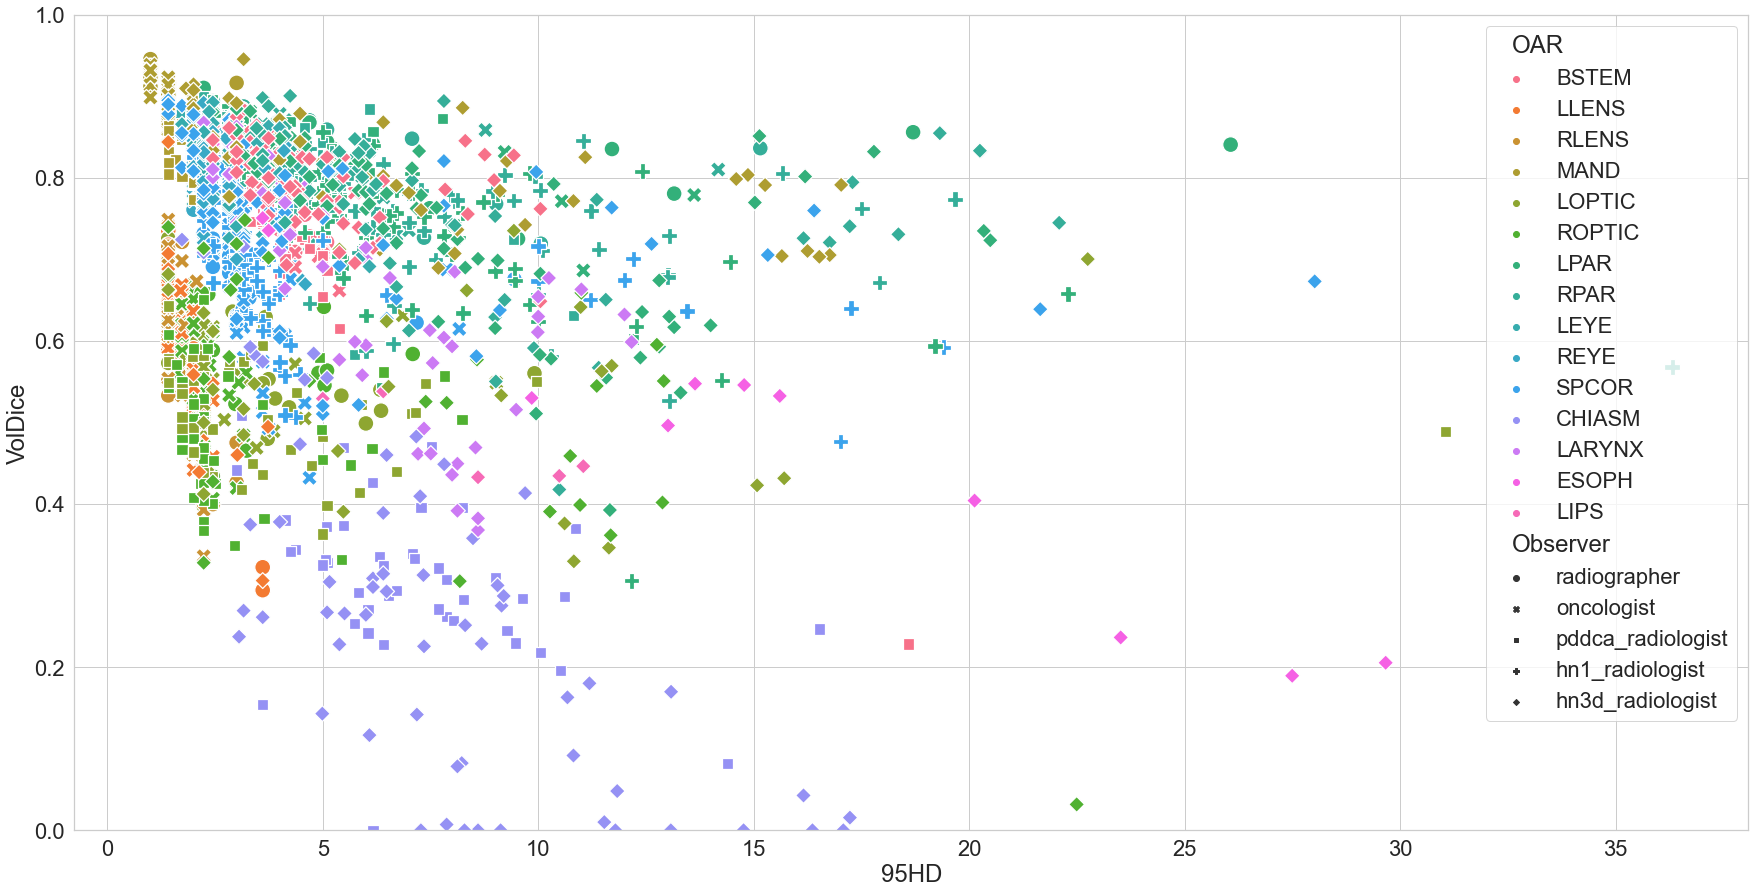

In [100]:
plt.figure(figsize=(30,15))
sea.set(font_scale=2)  # crazy big
sea.set_style("whitegrid")
sea.color_palette("Set1")
plt.ylim(0., 1.0)
exclude = ['LACOU', 'RACOU']
data_ = data[~data.OAR.isin(exclude)]
g = sea.scatterplot( data=data_[data_['95HD']<50], y='VolDice', x='95HD', hue='OAR', style='Observer', s=250)
# g.legend(loc='lower center', bbox_to_anchor=(-0.15, -.10))

In [1]:
import numpy as np
a = np.ones(35)

In [2]:
rois = ["BACKGR", "GTV", "LNECK", "RNECK", "BRAIN", "BSTEM", "SPCOR", "ESOPH", "LARYNX",
        "MAND", "POSTCRI", "LPAR", "RPAR", "LACOU", "RACOU", "LLAC", "RLAC",
        "RRETRO", "LRETRO", "RPLEX", "LPLEX", "LLENS", "RLENS", "LEYE", "REYE",
        "LOPTIC", "ROPTIC", "LSMAN", "RSMAN", "CHIASM", "LIPS", "OCAV", "IPCM",
        "SPCM", "MPCM"]

In [16]:

import random
c = random.choices(np.arange(0,35), k=10)

In [17]:
a[c] = 0

In [18]:
a

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0.])

In [35]:
[rois[s] for s in list(np.where(a == 1)[0])]

['BACKGR',
 'GTV',
 'LNECK',
 'RNECK',
 'SPCOR',
 'ESOPH',
 'LARYNX',
 'MAND',
 'POSTCRI',
 'LPAR',
 'RPAR',
 'RACOU',
 'LLAC',
 'LRETRO',
 'RPLEX',
 'LPLEX',
 'LLENS',
 'RLENS',
 'LEYE',
 'REYE',
 'ROPTIC',
 'LSMAN',
 'RSMAN',
 'CHIASM',
 'OCAV',
 'IPCM']